In [51]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [52]:
#Load dataset
df = pd.read_csv("/content/Employee-Attrition - Employee-Attrition.csv")

In [53]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Unnamed: 35
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,NaN
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,NaN
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,NaN
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,NaN
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,NaN
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,80,0,8,2,2,7,7,3,6,NaN
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,80,3,12,3,2,1,0,0,0,NaN
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,80,1,1,2,3,1,0,0,0,NaN
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,80,0,10,2,3,9,7,1,8,NaN
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,80,2,17,3,2,7,7,7,7,NaN


In [54]:
df['Attrition']=df['Attrition'].replace({'Yes':1,'No':0})

In [55]:
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [56]:
# checking for missing values
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [57]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Unnamed: 35'],
      dtype='object')

In [58]:
#LabelEncoder Method
from sklearn.preprocessing import LabelEncoder

categorical_col = df.select_dtypes(include='object').columns

In [59]:
categorical_col

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [60]:
encoders = {}

for col in categorical_col:
  encoders[col] = LabelEncoder()
  df[col] = encoders[col].fit_transform(df[col])

In [61]:
encoders

{'BusinessTravel': LabelEncoder(),
 'Department': LabelEncoder(),
 'EducationField': LabelEncoder(),
 'Gender': LabelEncoder(),
 'JobRole': LabelEncoder(),
 'MaritalStatus': LabelEncoder(),
 'Over18': LabelEncoder(),
 'OverTime': LabelEncoder()}

**Machine Learning Model**

In [62]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Unnamed: 35
0,41,1,2,1102,2,1,2,1,1,1,...,80,0,8,0,1,6,4,0,5,NaN
1,49,0,1,279,1,8,1,1,1,2,...,80,1,10,3,3,10,7,1,7,NaN
2,37,1,2,1373,1,2,2,4,1,4,...,80,0,7,3,3,0,0,0,0,NaN
3,33,0,1,1392,1,3,4,1,1,5,...,80,0,8,3,3,8,7,3,0,NaN
4,27,0,2,591,1,2,1,3,1,7,...,80,1,6,3,3,2,2,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,80,1,17,3,3,5,2,0,3,NaN
1466,39,0,2,613,1,6,1,3,1,2062,...,80,1,9,5,3,7,7,1,7,NaN
1467,27,0,2,155,1,4,3,1,1,2064,...,80,1,6,0,3,6,2,0,3,NaN
1468,49,0,1,1023,2,2,3,3,1,2065,...,80,0,17,3,2,9,6,0,8,NaN


In [63]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Unnamed: 35'],
      dtype='object')

In [ ]:
x = df[['Age', 'Department', 'MaritalStatus', 'OverTime', 'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'PerformanceRating', 'YearsAtCompany']]
y = df['Attrition']

**Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state = 42)

In [ ]:
#load a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
lr.score(x_test,y_test)

0.8707482993197279

**Decision Tree Classifier**

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assuming 'df' is your DataFrame and 'Attrition' is your target variable
x = df[['Age', 'Department', 'MaritalStatus', 'OverTime', 'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'PerformanceRating', 'YearsAtCompany']] # Features (remove target from the data)
y = df['Attrition']  # Target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

# Evaluate the model
print("Model Accuracy:", model.score(x_test, y_test))


Model Accuracy: 0.7721088435374149


In [65]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
y_prediction = dt.predict(x_test)

In [67]:
y_test

,Attrition
1041,0
184,0
1222,1
67,0
220,0
...,...
567,0
560,0
945,0
522,0


In [68]:
y_prediction

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0])

In [69]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_prediction)

acc

0.782312925170068

[Text(0.496025390625, 0.9705882352941176, 'DailyRate <= 0.5\ngini = 0.28\nsamples = 1176\nvalue = [978, 198]'),
 Text(0.25009765625, 0.9117647058823529, 'EmployeeCount <= 1.5\ngini = 0.182\nsamples = 837\nvalue = [752, 85]'),
 Text(0.3730615234375, 0.9411764705882353, 'True  '),
 Text(0.10125, 0.8529411764705882, 'Age <= 32.5\ngini = 0.39\nsamples = 113\nvalue = [83.0, 30.0]'),
 Text(0.0575, 0.7941176470588235, 'BusinessTravel <= 1.5\ngini = 0.499\nsamples = 55\nvalue = [29.0, 26.0]'),
 Text(0.03, 0.7352941176470589, 'Education <= 2859.5\ngini = 0.417\nsamples = 27\nvalue = [19, 8]'),
 Text(0.02, 0.6764705882352942, 'Education <= 2644.5\ngini = 0.351\nsamples = 22\nvalue = [17, 5]'),
 Text(0.015, 0.6176470588235294, 'Education <= 2523.5\ngini = 0.415\nsamples = 17\nvalue = [12, 5]'),
 Text(0.01, 0.5588235294117647, 'Education <= 1676.5\ngini = 0.375\nsamples = 16\nvalue = [12, 4]'),
 Text(0.005, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.015, 0.5, 'Education <= 1911.5\ngi

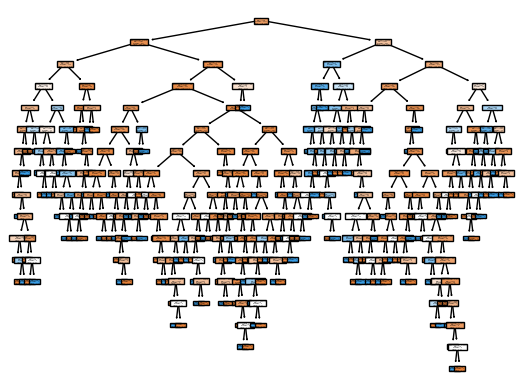

In [70]:
from sklearn.tree import plot_tree

plot_tree(dt,filled=True,feature_names=df.columns)

In [71]:
from sklearn.tree import DecisionTreeClassifier

dt_e = DecisionTreeClassifier(criterion='entropy')

dt_e.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [72]:
y_prediction = dt_e.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_prediction)

acc

0.8095238095238095

[Text(0.5374808282208589, 0.9736842105263158, 'DailyRate <= 0.5\nentropy = 0.654\nsamples = 1176\nvalue = [978, 198]'),
 Text(0.3065567484662577, 0.9210526315789473, 'EmployeeCount <= 1.5\nentropy = 0.474\nsamples = 837\nvalue = [752, 85]'),
 Text(0.42201878834355827, 0.9473684210526316, 'True  '),
 Text(0.1196319018404908, 0.868421052631579, 'Age <= 32.5\nentropy = 0.835\nsamples = 113\nvalue = [83.0, 30.0]'),
 Text(0.0736196319018405, 0.8157894736842105, 'BusinessTravel <= 1.5\nentropy = 0.998\nsamples = 55\nvalue = [29.0, 26.0]'),
 Text(0.04294478527607362, 0.7631578947368421, 'Education <= 7402.5\nentropy = 0.877\nsamples = 27\nvalue = [19, 8]'),
 Text(0.03680981595092025, 0.7105263157894737, 'Department <= 4.0\nentropy = 0.84\nsamples = 26\nvalue = [19, 7]'),
 Text(0.024539877300613498, 0.6578947368421053, 'Education <= 2833.5\nentropy = 0.994\nsamples = 11\nvalue = [6, 5]'),
 Text(0.018404907975460124, 0.6052631578947368, 'Education <= 2644.5\nentropy = 0.918\nsamples = 9\nvalue 

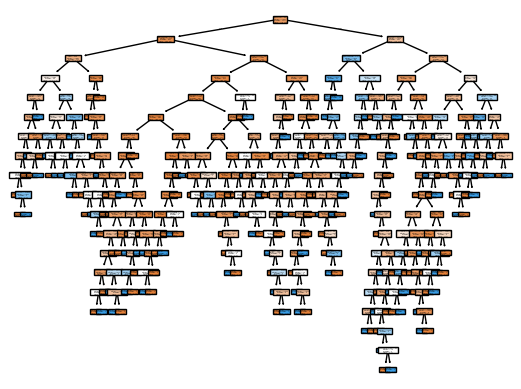

In [74]:
from sklearn.tree import plot_tree

plot_tree(dt_e,filled=True,feature_names=df.columns)

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lr = LogisticRegression()

lr.fit(x_train_scaled,y_train)

lr.score(x_test_scaled,y_test)

0.8605442176870748

**cross_val_score**

In [76]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation to check model performance
cv_scores = cross_val_score(lr, x_test_scaled, y_test, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores)}")


Cross-validation scores: [0.86440678 0.86440678 0.84745763 0.86440678 0.87931034]
Mean CV score: 0.8639976621858562


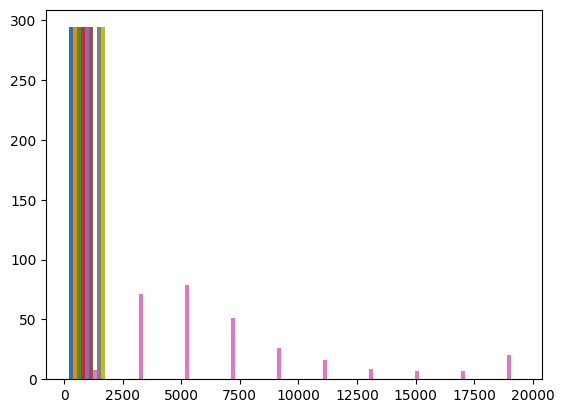

In [77]:
plt.hist(x_test)
plt.show()

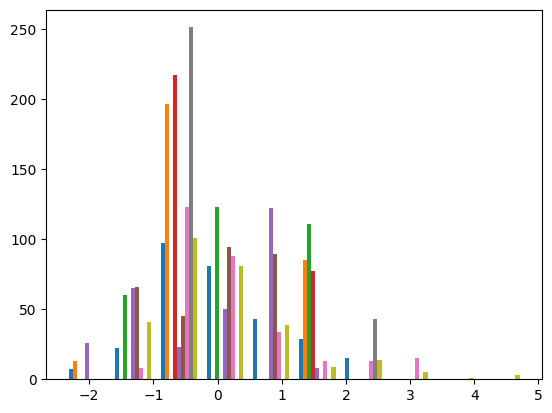

In [78]:
plt.hist(x_test_scaled)
plt.show()

In [79]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [80]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [81]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8435374149659864
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       255
           1       0.29      0.13      0.18        39

    accuracy                           0.84       294
   macro avg       0.59      0.54      0.55       294
weighted avg       0.80      0.84      0.82       294



In [84]:
import pickle
filename = 'Employee.pkl'
pickle.dump(model, open(filename, 'wb'))

In [85]:
model = pickle.load(open('Employee.pkl', 'rb'))